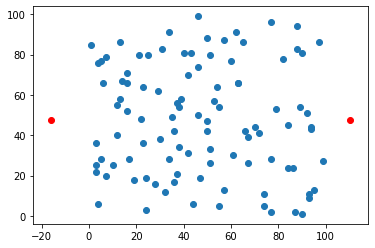

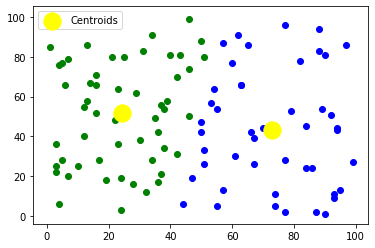

2846.268015219385


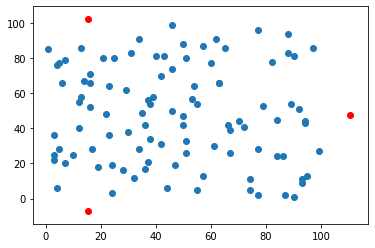

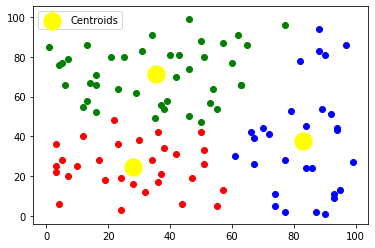

2254.2287741671935


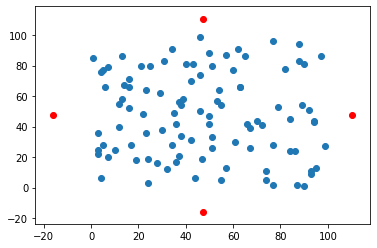

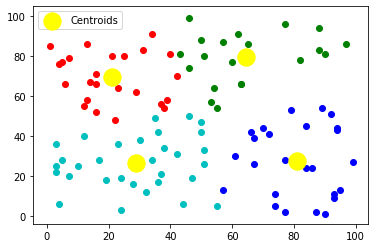

1868.5148222759483
2846.268015219385 2254.2287741671935 1868.5148222759483
0.6515006525677958


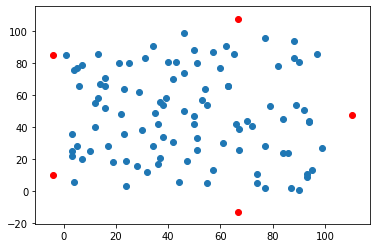

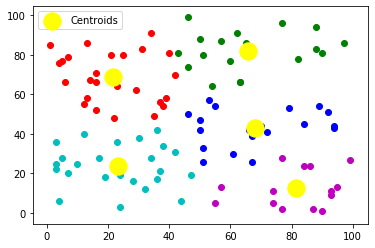

1668.9688598619884
0.5173418317785489


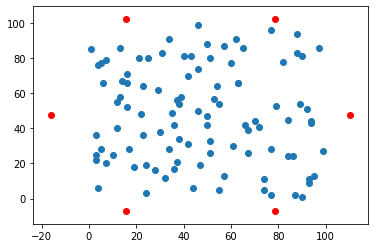

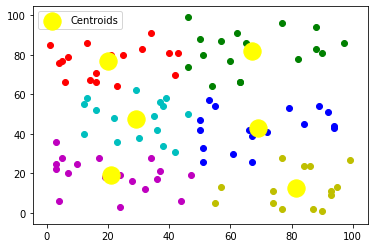

1553.304981084783
0.579635274891003


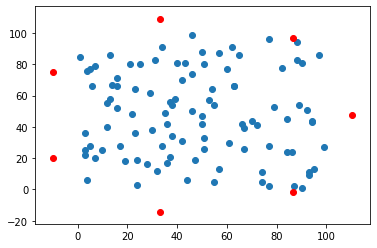

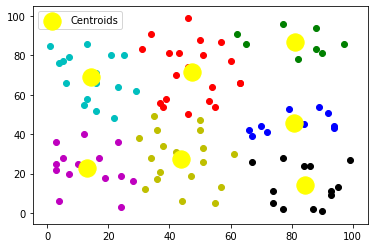

1349.5498179439103
1.7616144754521943
6


In [13]:
import matplotlib.pyplot as plt
import numpy as np


def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def cluster(k, x, y, x_c, y_c):
    clust = []
    for i in range(0, len(x)):
        min = dist(x[i], y[i], x_c[0], y_c[0])
        min_numb = 0
        for j in range(1, k):
            if min > dist(x[i], y[i], x_c[j], y_c[j]):
                min = dist(x[i], y[i], x_c[j], y_c[j])
                min_numb = j
        clust.append(min_numb)
    return clust


def recalc_c(k, x, y, x_c, y_c, clust):
    for i in range(k):
        avg_x = 0
        avg_y = 0
        points_cnt = 0
        for j in range(len(x)):
            if clust[j] == i:
                points_cnt += 1
                avg_x += x[j]
                avg_y += y[j]
        x_c[i] = avg_x / points_cnt
        y_c[i] = avg_y / points_cnt
    clust_new = cluster(k, x, y, x_c, y_c)
    crit = 0
    if clust_new != clust:
        crit = recalc_c(k, x, y, x_c, y_c, clust_new)
    else: 
        colors = "bgrcmykw"
        color_index = 0
        for p in range(k):
            x_p = []
            y_p = []
            for i in range(len(x)):
                if clust[i] == p:
                    x_p.append(x[i])
                    y_p.append(y[i])
                    
            plt.scatter(x_p,y_p,c=colors[color_index])
            color_index += 1
        plt.scatter(x_c,y_c,s=300,c='yellow',label='Centroids')
        plt.legend()
        plt.show()    
        for i in range(k):
            for j in range(len(x)):
                if clust[j] == i:
                    crit += dist(x[j], y[j], x_c[i], y_c[i])
    return crit        

def kmeans(x, y, k):
    x_cc = np.mean(x)
    y_cc = np.mean(y)
    r = []
    for i in range(0, len(x)):
        r.append(dist(x[i], y[i], x_cc, y_cc))
    R = max(r)
    x_c, y_c = [], []
    for i in range(0, k):
        x_c.append(R * np.cos(2 * np.pi * i / k) + x_cc)
        y_c.append(R * np.sin(2 * np.pi * i / k) + y_cc)     
    plt.scatter(x, y)
    plt.scatter(x_c, y_c, color='r')
    plt.show()
    clust = cluster(k, x, y, x_c, y_c)
    crit = recalc_c(k, x, y, x_c, y_c, clust)
    print(crit)
    return crit


def main():
    n, k = 100, 3
    x = np.random.randint(1, 100, n)
    y = np.random.randint(1, 100, n)
    crit_k_prev = kmeans(x, y, k-1)
    crit_k_curr = kmeans(x, y, k)
    crit_k_next = kmeans(x, y, k+1)
    print(crit_k_prev, crit_k_curr, crit_k_next)
    d = abs(crit_k_curr - crit_k_next) / abs(crit_k_prev - crit_k_curr)
    print(d)
    min = False
    while True:
        crit_k_prev = crit_k_curr
        crit_k_curr = crit_k_next
        k=k+1
        crit_k_next = kmeans(x, y, k+1)
        d_new = abs(crit_k_curr - crit_k_next) / abs(crit_k_prev - crit_k_curr)
        print(d_new)
        if d_new >= d:
            break
    print(k)
    
main()